<a href="https://colab.research.google.com/github/Justsharon/titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('deep')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

if not os.path.exists('images'):
    os.makedirs('images')

In [2]:

print("Loading the Titanic dataset from URL ...")
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"

df = pd.read_csv(url)
print("Dataset loaded successfully!")
print(df.head())

Loading the Titanic dataset from URL ...
Dataset loaded successfully!
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [3]:
# check dataset shape (rows , cols)
rows, cols = df.shape
print(f"The dataset contains: {rows} rows(passengars) and {cols} columns(features)")

The dataset contains: 887 rows(passengars) and 8 columns(features)


In [4]:
# understanding the dataset structure
print("\n--- Dataset Structure ---")
print("Displaying the first few rows of the dataset:")
print(df.head())


--- Dataset Structure ---
Displaying the first few rows of the dataset:
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [5]:
print("\nColum names in the dataset:")
print(df.columns.tolist())


Colum names in the dataset:
['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']


In [6]:
# checking data types and missing values
print("\n--- Data Types and Missing Values ---")
print("Data types of each column:")
print(df.dtypes)



--- Data Types and Missing Values ---
Data types of each column:
Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object


In [7]:
print("\nChecking for missing values:")
missing_values = df.isna().sum()
print(missing_values)

if missing_values.sum() > 0:
    print(f"\nTotal missing values: {missing_values.sum()}")
    print("Missing values found in the dataset.")
else:
    print("\nNo missing values found in the dataset.")


Checking for missing values:
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

No missing values found in the dataset.


Statistical Summary
* Descriptive statistical summary provides insights into central tendency, dispersion, and shape of numerical dataset

In [8]:
print("\n--- Statistical Summary ---")
print("Summary statistics for numerical columns:")
print(df.describe())


--- Statistical Summary ---
Summary statistics for numerical columns:
         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   1

**Key observations**
* **Survival Rate**: The mean of survived(0.386) indicates that about 38.6% of passengers in this dataset survived.
* **Age**: The average age was ~29.5 years, with a minimum of 0.42(infant) and a maximum of 80
* **Fares:** Fares varied widely, from $0 to over $512, with a mean of $32.30. The large standard deviation($49.78) suggest significant variabilty and potential outliers
Median < Mean → long right tail (a few people paid very high fares).

**Exploratory Analysis: Uncovering patterns**
* A deepdive into individual variables and their relationship with survival

In [9]:
survival_count = df['Survived'].value_counts()
survival_count

,count
Survived,
0,545
1,342


In [10]:
survival_percentage = df['Survived'].value_counts(normalize=True) * 100
survival_percentage


,proportion
Survived,
0,61.443067
1,38.556933


In [11]:
survival_rate = float(df['Survived'].mean() * 100)
survival_rate


38.55693348365276

Out of 887 passengers, 342(38.6%) survived, and 545(61.4%) did not.

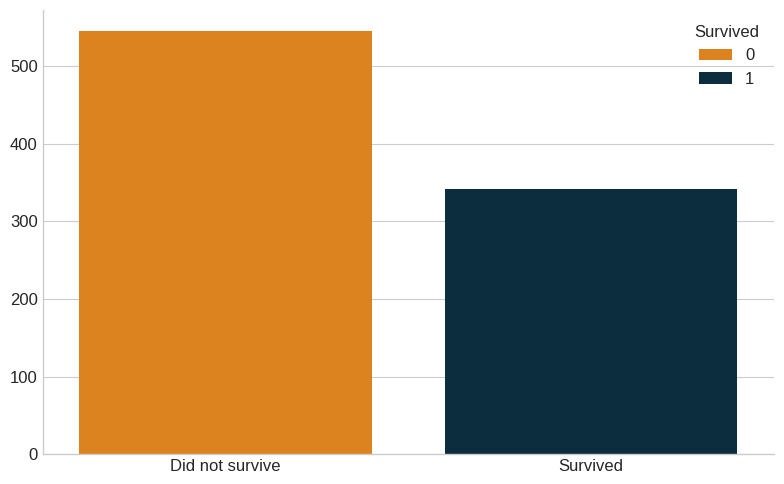

In [12]:
# create figure with defined size
plt.figure(figsize=(8, 5))

ax = sns.countplot(x='Survived', data=df, hue='Survived', palette=['#fb8500','#023047'])

#remove chart title and axis labels for a cleaner look
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')

# replace 0 and 1 with readable labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Did not survive', 'Survived'])

# remove top and right borders
sns.despine()

# adjust layout to avoid padding issues
plt.tight_layout()

More non-survivors than survivors

**Gender Analysis**
Did gender play a role in survival? The women and children first protocol suggests it might have

In [13]:
gender_survival = df.groupby('Sex')['Survived'].mean() * 100
gender_survival

,Survived
Sex,
female,74.203822
male,19.022688


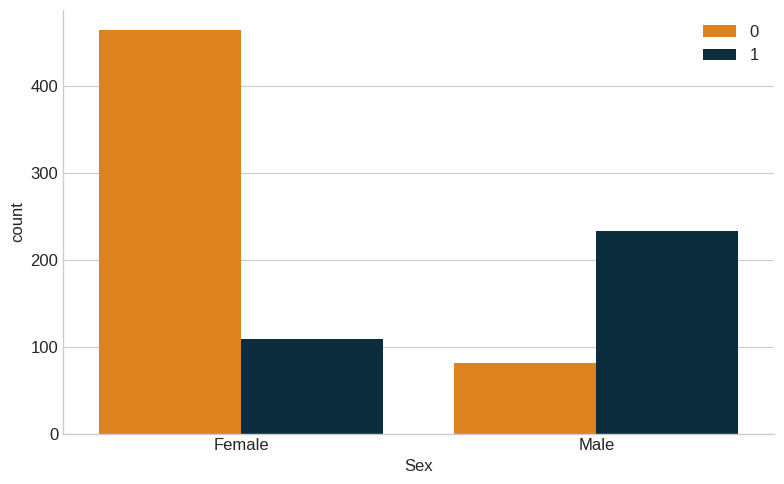

In [14]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sex', data=df, hue='Survived', palette=['#fb8500','#023047'])

ax.set_xticks([0, 1])
ax.set_xticklabels(['Female', 'Male'])
ax.legend_.set_title("")

sns.despine()
plt.tight_layout()

The result indicates that 74.2% of females survived, compared to 19.0% of males. Gender was  a major factor in survival

Did socioeconomic status, represented by passengar class influence survival?

In [15]:
class_survival = df.groupby('Pclass')['Survived'].mean() * 100
class_survival

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.435318


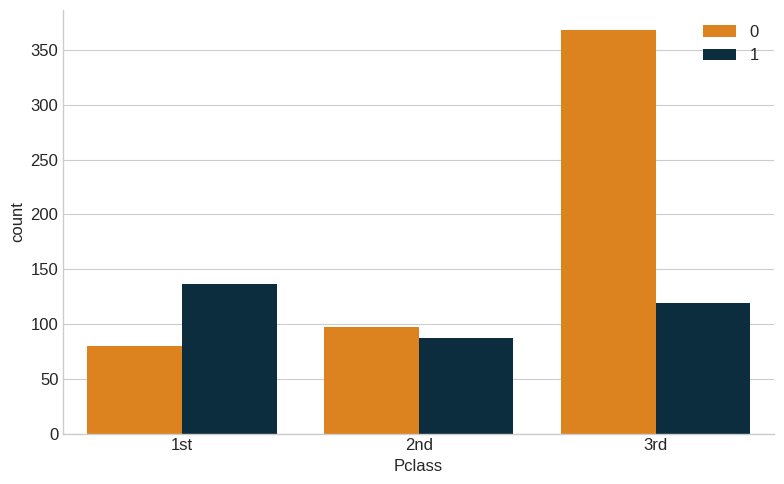

In [16]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(
    x='Pclass',
    data=df,
    hue='Survived',
    palette=['#fb8500','#023047'])

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['1st', '2nd', '3rd'])
ax.legend_.set_title("")

sns.despine()
plt.tight_layout()

There is clear hierrachy: 63.0% of first class passengers survived compared to 47.3% of 2nd class and only 24.4% of 3rd class passengers. Higher class meant better survival chances



**Age Distribution Analysis**

In [17]:
age_stats = df['Age'].describe().round(2).to_frame().T
age_stats

,count,mean,std,min,25%,50%,75%,max
Age,887.0,29.47,14.12,0.42,20.25,28.0,38.0,80.0


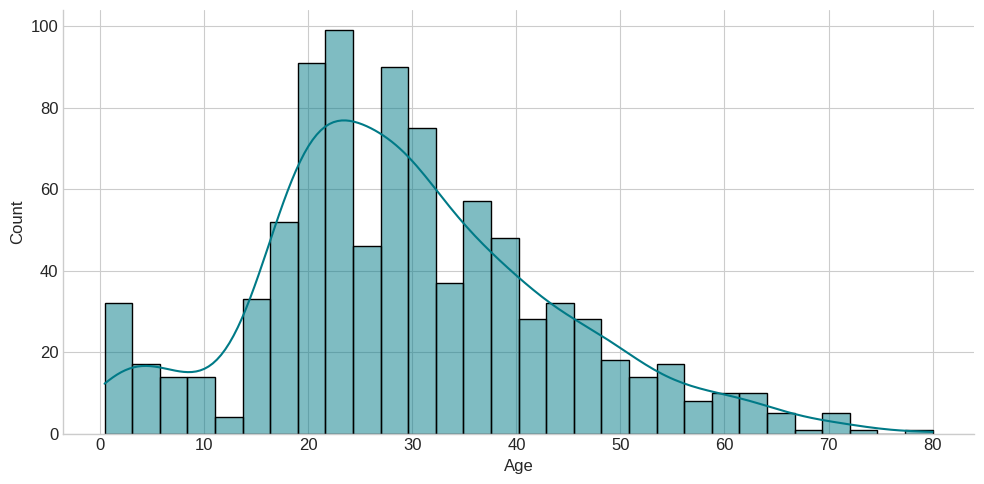

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(
    df['Age'],
    bins=30,
    kde=True,
    color='#007A87'
)

sns.despine()
plt.tight_layout()


This histogram peaks for passengers in their 20s and 30s, with fewer children and elderly individuals. To get a clear picture of whether age influenced survival, create categories

In [19]:
df['Age_Category'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 35, 60, 100],
    labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
)


In [20]:
df.groupby('Age_Category')['Survived'].mean() * 100

/tmp/ipython-input-3141997691.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Category')['Survived'].mean() * 100


,Survived
Age_Category,
Child,54.430380
Teenager,40.229885
Young Adult,36.383442
Adult,38.983051
Senior,19.230769


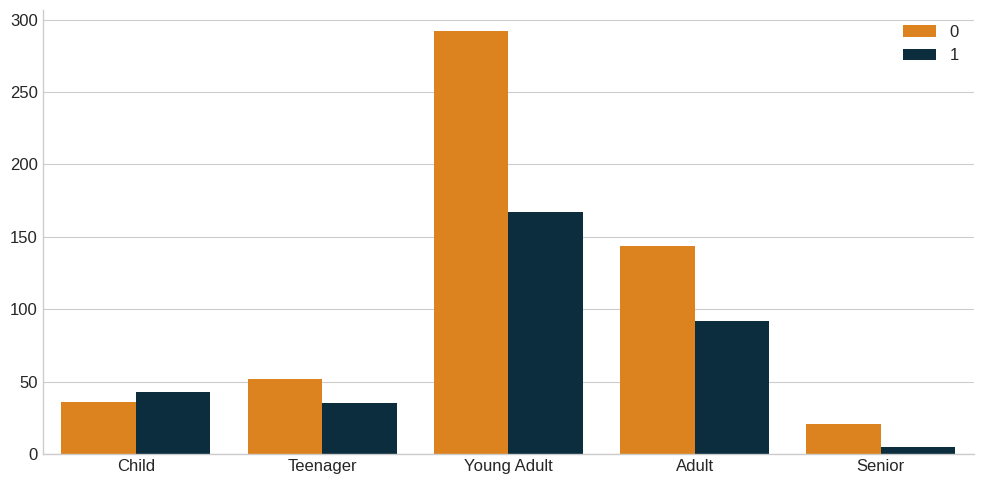

In [21]:
plt.figure(figsize=(10, 5))

ax = sns.countplot(
    x='Age_Category',
    data=df,
    hue='Survived',
    palette=['#fb8500','#023047']
    )
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')

ax.legend_.set_title("")

sns.despine()
plt.tight_layout()

Childen (0-12) had the highest survival rate(54.4%), supporting the "women and children first" idea.Seniors (60+) had the lowest survival rate(19.2%)

**Fare Analysis**
Does the ticket price correlate with survival

In [23]:
df['Fare_Category'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [25]:
df.groupby('Fare_Category')['Survived'].mean() * 100

/tmp/ipython-input-20720020.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Fare_Category')['Survived'].mean() * 100


,Survived
Fare_Category,
Low,21.848739
Medium,29.126214
High,45.701357
Very High,58.108108


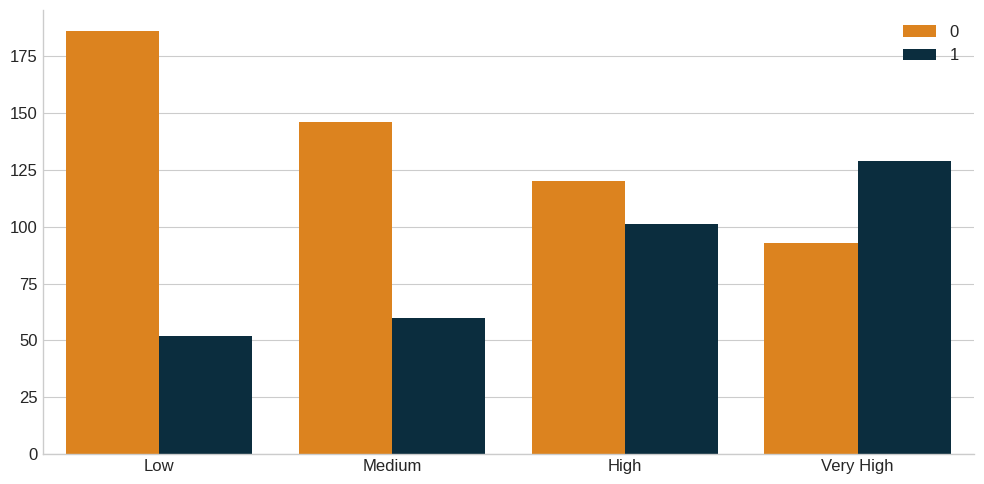

In [26]:
plt.figure(figsize=(10, 5))

ax = sns.countplot(
    x='Fare_Category',
    data=df,
    hue='Survived',
    palette=['#fb8500','#023047']
)

ax.set_xlabel('')
ax.set_ylabel('')

ax.legend_.set_title("")

sns.despine()
plt.tight_layout()

There is clear positive correlation: passengars in the highest fare category had  a 58.1% survival rate compared to only 21.8% for those  in the lowest category.

**Family Size Analysis**

In [27]:
df['family_size'] = (df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'])

In [31]:
family_survival =(
    df.groupby('family_size')['Survived']
    .mean().round(2) * 100
)
family_survival

,Survived
family_size,
0,31.0
1,55.0
2,58.0
3,72.0
4,20.0
5,14.0
6,33.0
7,0.0
10,0.0


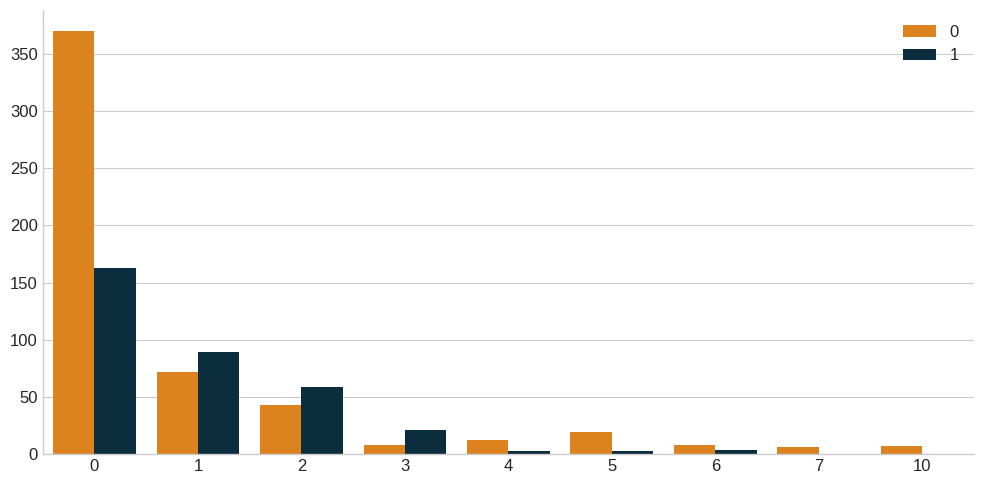

In [32]:
plt.figure(figsize=(10, 5))

ax = sns.countplot(
    x='family_size',
    data=df,
    hue='Survived',
    palette=['#fb8500','#023047']
)

ax.set_xlabel('')
ax.set_ylabel('')

ax.legend_.set_title("")

sns.despine()
plt.tight_layout()

Survival probability shows a nonlinear relationship with family size:

Moderate-sized families (1–3) had the highest survival rates.

Individuals alone or large families had much lower survival.

Inference:
Having a small group improved coordination and mutual aid during evacuation, while being alone or in a large family reduced survival likelihood

**Correlation Analysis**

In [34]:
gender_class_survival = (
    df.groupby(['Sex', 'Pclass'])['Survived']
    .mean()
    .round(2) * 100
)
gender_class_survival

Sex     Pclass
female  1         97.0
        2         92.0
        3         50.0
male    1         37.0
        2         16.0
        3         14.0
Name: Survived, dtype: float64

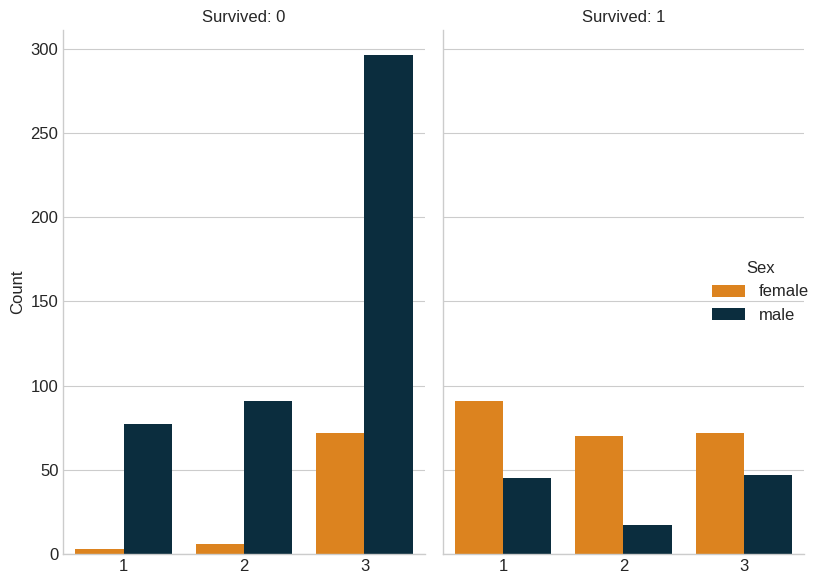

In [36]:
g = sns.catplot(
    data=df,
    x='Pclass',
    hue='Sex',
    col='Survived',
    kind='count',
    height=6,
    aspect=0.6,
    palette=['#fb8500','#023047']
)

g.set_axis_labels("", "Count")
g.set_titles("Survived: {col_name}")
g.despine()
plt.tight_layout()


Women had higher chances of survival accross all classes. Women in 1st class had an almost guaranteed survival chances(97%) while men in third had lowest chances of survival(14%)

**Age Class and Survival**

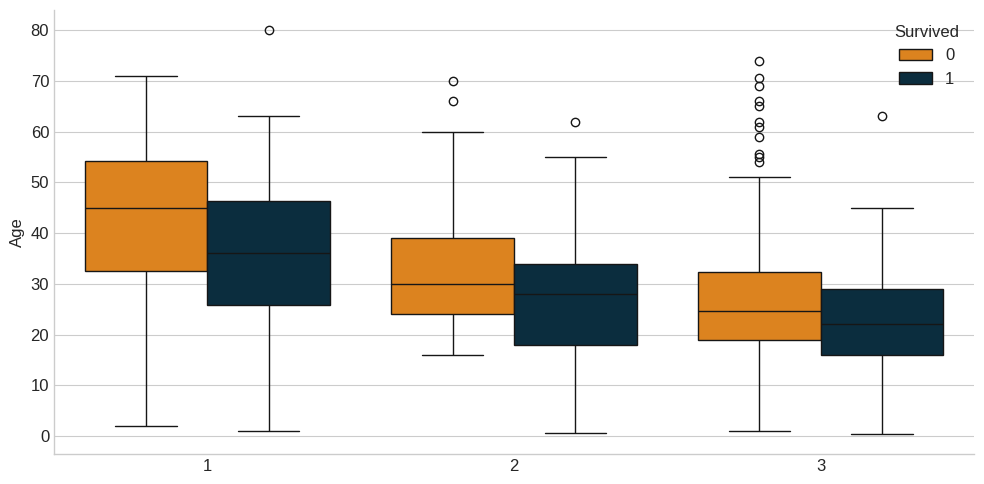

In [38]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(
    x='Pclass',
    y='Age',
    hue='Survived',
    data=df,
    palette=['#fb8500','#023047']
)

plt.xlabel("")
plt.ylabel("Age")
# Access the legend through the axes object
if ax.get_legend():
    ax.get_legend().set_title("Survived")


sns.despine()
plt.tight_layout()

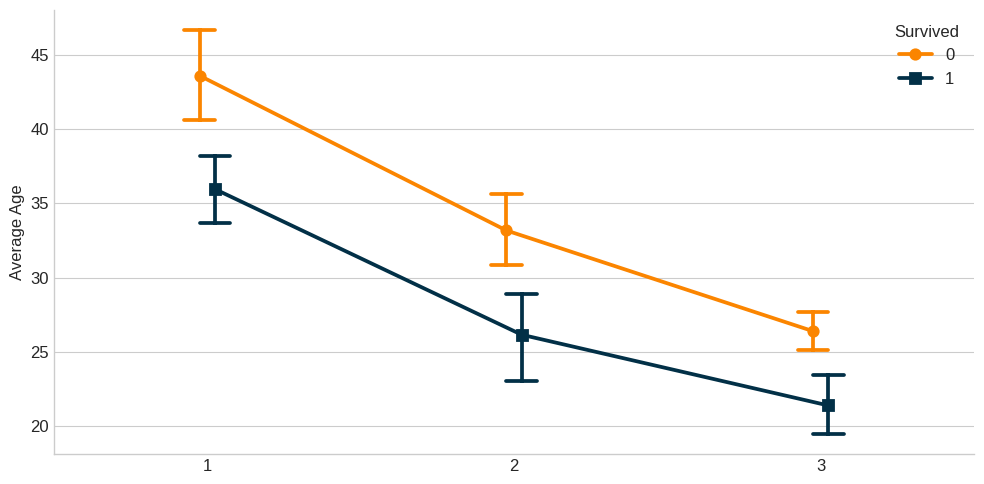

In [43]:
plt.figure(figsize=(10, 5))

ax = sns.pointplot(
    x='Pclass',
    y='Age',
    hue='Survived',
    data=df,
    palette=['#fb8500','#023047'],
    dodge=True,
    markers=['o', 's'],
    capsize=0.1
)

ax.set_xlabel("")
ax.set_ylabel("Average Age")

sns.despine()
plt.tight_layout()